# Univariate Linear Regression

Implementing **Univariate Linear Regression (LR)** also referred to as **Linear Regression with one variable**, using numpy and then using scikit-learn.

## Import libraries

Import libraries required for data handling and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Generate data

Generate data such that the relationship is almost linear so it can be used for creating a univariate LR model. Data is generated using normal distribution.

In [2]:
x = np.arange(200)
y = np.random.normal(np.arange(200), 1)

## Univariate Linear Regression

Define the various elements of the model.

### Definitions

* X - features
* y - labels
* m - total data points
* theta_0, theta_1 - parameters

### Hypothesis

$h_{theta}(x) = theta_0 + theta_1*x$

### Cost function
Cost function for univariate linear regression model is **Squared Error Cost Function**. It works well and is commonly *used for regression problems*.

$ J(theta_0, theta_1) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{theta}(x^{(i)}) - y^{(i)})^2 $

### Optimization function

$ \min_{theta_0, theta_1} \big( J(theta_0, theta_1) \big) $

## Gradient Descent

**Algorithm:**
* Start with some $theta_0, theta_1$
* Change $theta_0, theta_1$ such that it minimizes J(theta_0, theta_1) till we reach minimum

**Update function:**

For $j \in (0, 1)$ and learning rate $alpha$:

$ theta_j := theta_j - alpha * \frac{\partial \big( J(theta_0, theta_1) \big) }{\partial (theta_j)}$


**NOTE:** For univariate linear regression problems, there is only one minimum which is the **global minimum** as it is a convex function.

### V1: Using Loops

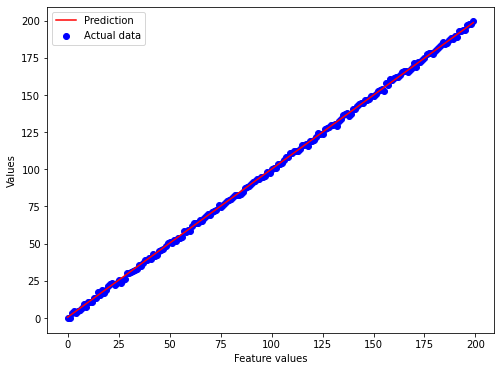

In [3]:
## Define parameters
theta_0 = 0.5
theta_1 = 0.5
error = float("inf")
stop = False

## Define learning rate
alpha = 0.00001

## Identify best parameter values
for epoch in np.arange(1000):
    ## Derivate of wrt to theta_0
    sum_of_diff = 0
    for i in np.arange(200):
        sum_of_diff = sum_of_diff + (theta_0 + theta_1*i - y[i])
    derivative_wrt_theta_0 = sum_of_diff/200

    ## Derivate of wrt to theta_1
    sum_of_diff_with_x = 0
    for i in np.arange(200):
        sum_of_diff_with_x = sum_of_diff_with_x + (theta_0 + theta_1*i - y[i])*i
    derivative_wrt_theta_1 = sum_of_diff_with_x/200

    ## Update parameters
    theta_0 = theta_0 - alpha*derivative_wrt_theta_0
    theta_1 = theta_1 - alpha*derivative_wrt_theta_1

    ## Squared Error Cost
    sum_of_squared_diff = 0
    for i in np.arange(200):
        sum_of_squared_diff = sum_of_squared_diff + (theta_0 + theta_1*i - y[i])**2
    new_error = sum_of_squared_diff/400
    
    # Stop epochs if error changes only very minutely
    if new_error < error:
        if error - new_error < 0.0001: # Custom defined value
            error = new_error
            stop = True
            
    if stop:
        break
        
## Get predictions
predictions = []
for i in np.arange(200):
    predictions.append(theta_0 + theta_1*i)
    
## Plot results
plt.figure(figsize = (8, 6))
plt.scatter(np.arange(200), y, color = "blue", label = "Actual data") # Real data
plt.plot(predictions, color = "red", label = "Prediction") # Predicted linear regression line
plt.xlabel("Feature values")
plt.ylabel("Values")
plt.legend();

### V2: Using Matrices and Matrix Operations

In [4]:
class univariate_linear_regression():
    
    theta = np.array([0.5, 0.5]).reshape(2, 1)
    alpha = 0.00001
    
    def train(self, feature, label, iterations, threshold):
        
        errors = []
        
        for i in range(iterations):
            
            # Create matrix
            x_matrix = np.ones((len(x), 2))
            x_matrix[:, 1] = feature
            
            # Update parameters
            diff = x_matrix.dot(self.theta) - label.reshape(-1, 1)
            self.theta[0, 0] = self.theta[0, 0] - self.alpha*(np.sum(diff)/len(feature))
            self.theta[1, 0] = self.theta[1, 0] - self.alpha*(np.sum(feature.dot(diff))/len(feature))
            
            # Calculate error
            errors.append(np.sum((x_matrix.dot(self.theta) - label.reshape(-1, 1))**2)/(2*len(feature)))
            if len(errors) > 1:
                if errors[i-1] - errors[i] < threshold:
                    print("LR converged")
                    break
                    
        if i == iterations:
            print("LR could not converge under the required threshold")
            
        return errors
            
    def predict(self, feature):
        
        # Create matrix
        x_matrix = np.ones((len(feature), 2))
        x_matrix[:, 1] = feature
        
        # Return prediction
        return x_matrix.dot(self.theta)

LR converged


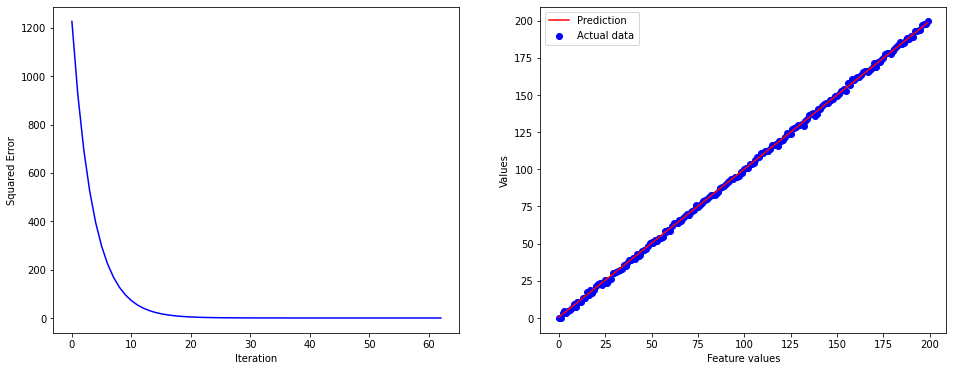

In [5]:
# Run algorithm
lr = univariate_linear_regression()
errors = lr.train(x, y, 1000, 0.00001)

# Create plot
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

# Plot errors
ax[0].plot(errors, color = "blue")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Squared Error")

## Plot results
ax[1].scatter(np.arange(200), y, color = "blue", label = "Actual data") # Real data
ax[1].plot(lr.predict(x), color = "red", label = "Prediction") # Predicted linear regression line
ax[1].set_xlabel("Feature values")
ax[1].set_ylabel("Values")
ax[1].legend();

### V3: Using scikit-learn

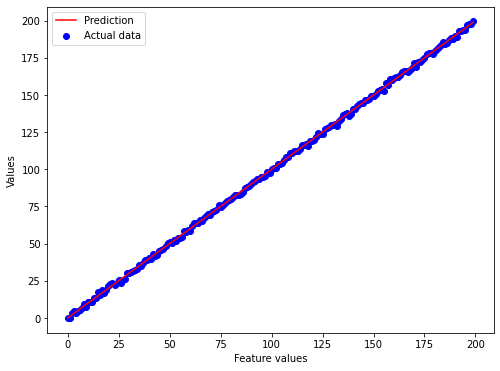

In [6]:
linearRegression = LinearRegression(fit_intercept = True, # We want to fit theta_0
                                        copy_X = True, # Any modifications are not translated to original data
                                        n_jobs = None, # Data is very small and doesn't need multiple jobs
                                        positive = False) # No need to have force positive parameter values
linearRegression.fit(x.reshape(-1, 1), y)

## Plot results
plt.figure(figsize = (8, 6))
plt.scatter(np.arange(200), y, color = "blue", label = "Actual data") # Real data
plt.plot(linearRegression.predict(x.reshape(-1, 1)), 
         color = "red", label = "Prediction") # Predicted linear regression line
plt.xlabel("Feature values")
plt.ylabel("Values")
plt.legend();